In [122]:
import numpy as np, pandas as pd, ROOT, matplotlib.pyplot as plt,matplotlib
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [124]:
#! ls ../*.root
#! mv  ../GiBUU_H.root ahmed/H_10pt6GeV.root

../data_Pb_no_CCcut.root  ../GiBUU_H.root  ../out.root	../test.root


In [125]:
f=ROOT.TFile(f'ahmed/H_10pt6GeV.root')
#f=ROOT.TFile(f'../GiBUU_10pt6GeV.root')
t=f.Get("RootTuple")
print([b.GetName() for b in t.GetListOfBranches()])
N=t.GetEntries()
Ebeam=10.6
count=0
Mp=0.9383
maxevents=1000000
d={}
for var in 'x Q2 z leading_z pT2 leading_pid pid leading_pT2 leading_phi phi drap theta1lab theta2lab rap1 rap2 p leading_p'.split():
    d[var]=[]
for event in t:
    if event.Q2<1:
        continue
    if event.nu/Ebeam>0.85:
        continue
    W=np.sqrt(-event.Q2+Mp**2+2*Mp*event.nu)
    if W<2:
        continue
    if not count%10000 :
        print(count, "/", N, "%.3f%%"% (count/N*100))
    if count > maxevents:
        break
    Emax=0
    pid_leading=0
    for h in range(len(event.Px)):
        if event.E[h]>Emax:
            Emax = event.E[h]
            h_at_max=h
    pid_leading = event.barcode[h_at_max]
    pT2_leading = event.Px[h_at_max]**2+event.Py[h_at_max]**2
    phi_leading = np.arctan2(event.Py[h_at_max], event.Px[h_at_max])
    Y_leading = 1/2*np.log((event.E[h_at_max]+event.Pz[h_at_max])/(event.E[h_at_max]-event.Pz[h_at_max]))
    z_leading=Emax/event.nu


    thetae = 2*np.arcsin(np.sqrt(event.Q2/(4*Ebeam*(Ebeam-event.nu))))
    thetaq = np.arcsin((Ebeam-event.nu)*np.sin(thetae)/np.sqrt(event.nu**2+event.Q2))
    for h in range(len(event.Px)):
        d['Q2'].append(event.Q2)
        d['x'].append(event.Q2/(Mp*2*event.nu))
        d['z'].append(event.E[h]/event.nu)
        d['pT2'].append(event.Px[h]**2+event.Py[h]**2)
        d['p'].append(np.sqrt(event.Px[h]**2+event.Py[h]**2+event.Pz[h]**2))
        d['leading_p'].append(np.sqrt(event.Px[h_at_max]**2+event.Py[h_at_max]**2+event.Pz[h_at_max]**2))
        d['pid'].append(event.barcode[h])
        d['leading_z'].append(z_leading)
        d['leading_pid'].append(pid_leading)
        d['leading_pT2'].append(pT2_leading)
        d['leading_phi'].append(phi_leading)
        d['phi'].append(np.arctan2(event.Py[h], event.Px[h]))
        Y2 = 1/2*np.log((event.E[h]+event.Pz[h])/(event.E[h]-event.Pz[h]))
        
        d['rap1'].append(Y_leading)
        d['rap2'].append(Y2)
        d['drap'].append(Y_leading-Y2)
        
        theta1lab=np.arccos((np.sin(thetaq)*event.Px[h_at_max]+np.cos(thetaq)*event.Pz[h_at_max])/\
                            np.sqrt(event.Px[h_at_max]**2+event.Py[h_at_max]**2+event.Pz[h_at_max]**2))
        theta2lab=np.arccos((np.sin(thetaq)*event.Px[h]+np.cos(thetaq)*event.Pz[h])/\
                            np.sqrt(event.Px[h]**2+event.Py[h]**2+event.Pz[h]**2))
        
        d["theta1lab"].append(theta1lab)
        d['theta2lab'].append(theta2lab)
    count+=1
df = pd.DataFrame(d)
df['deg']=[np.pi/180]*len(df)
#root_pandas.to_root(df,f'ahmed/drap_test_22GeV_hadrons.root', 'hadrons')

['weight', 'barcode', 'Px', 'Py', 'Pz', 'E', 'x', 'y', 'z', 'evType', 'nu', 'Q2', 'eps', 'phiL']
0 / 1699902 0.000%
10000 / 1699902 0.588%
20000 / 1699902 1.177%
30000 / 1699902 1.765%
40000 / 1699902 2.353%
50000 / 1699902 2.941%
60000 / 1699902 3.530%
70000 / 1699902 4.118%
80000 / 1699902 4.706%
90000 / 1699902 5.294%
100000 / 1699902 5.883%
110000 / 1699902 6.471%
120000 / 1699902 7.059%
130000 / 1699902 7.647%
140000 / 1699902 8.236%
150000 / 1699902 8.824%
160000 / 1699902 9.412%
170000 / 1699902 10.001%
180000 / 1699902 10.589%
190000 / 1699902 11.177%
200000 / 1699902 11.765%
210000 / 1699902 12.354%
220000 / 1699902 12.942%
230000 / 1699902 13.530%
240000 / 1699902 14.118%
250000 / 1699902 14.707%
260000 / 1699902 15.295%
270000 / 1699902 15.883%
280000 / 1699902 16.472%
290000 / 1699902 17.060%
300000 / 1699902 17.648%
310000 / 1699902 18.236%
320000 / 1699902 18.825%
330000 / 1699902 19.413%
340000 / 1699902 20.001%
350000 / 1699902 20.589%
360000 / 1699902 21.178%
370000 / 

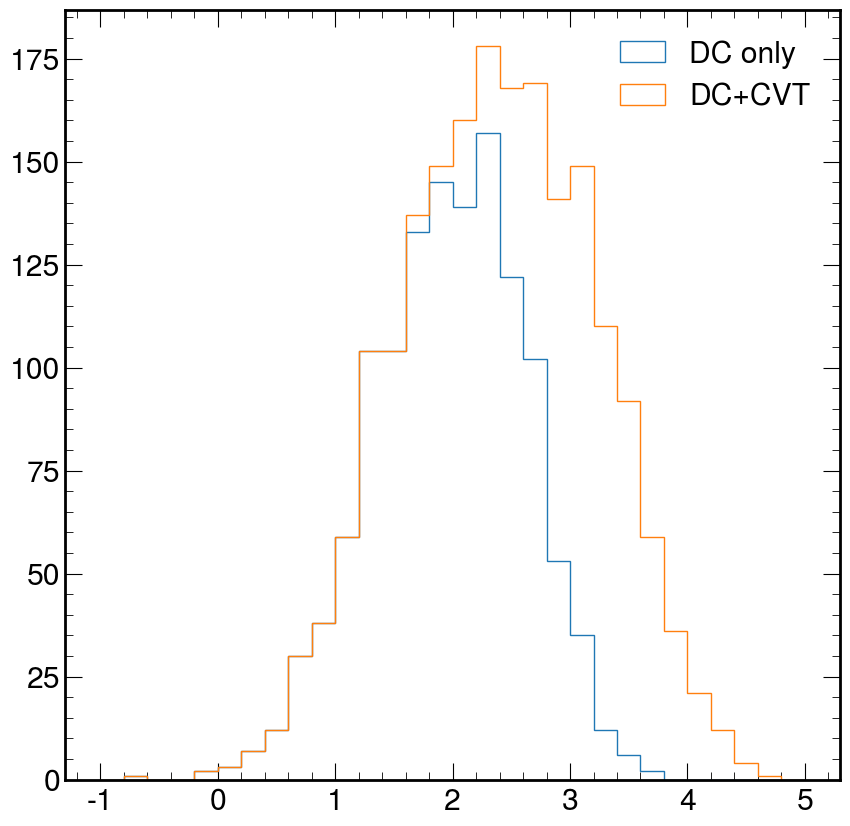

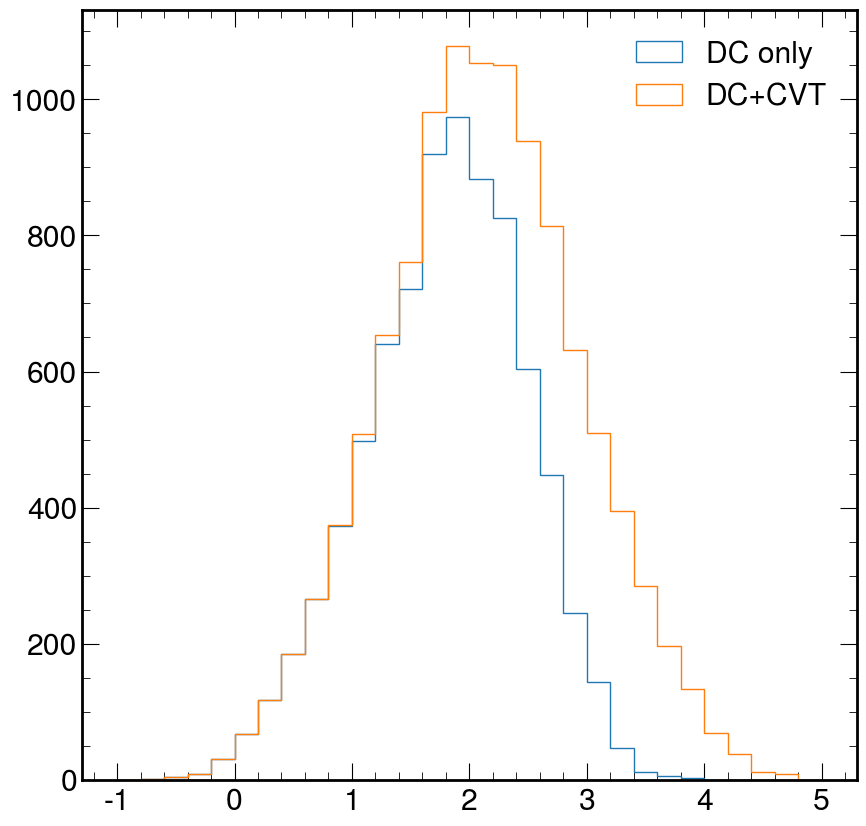

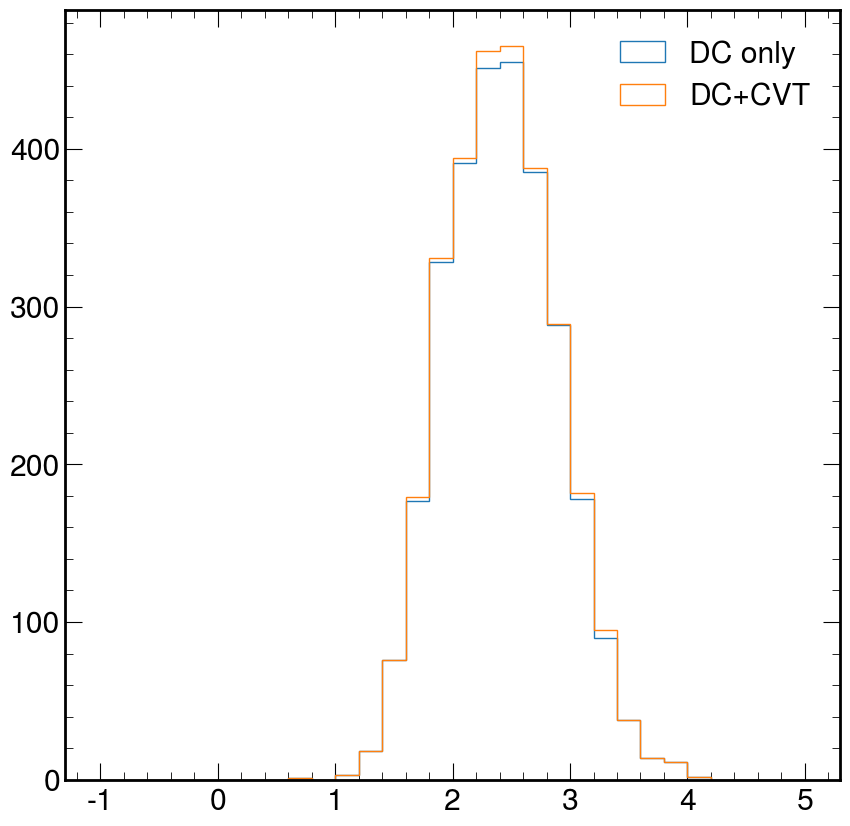

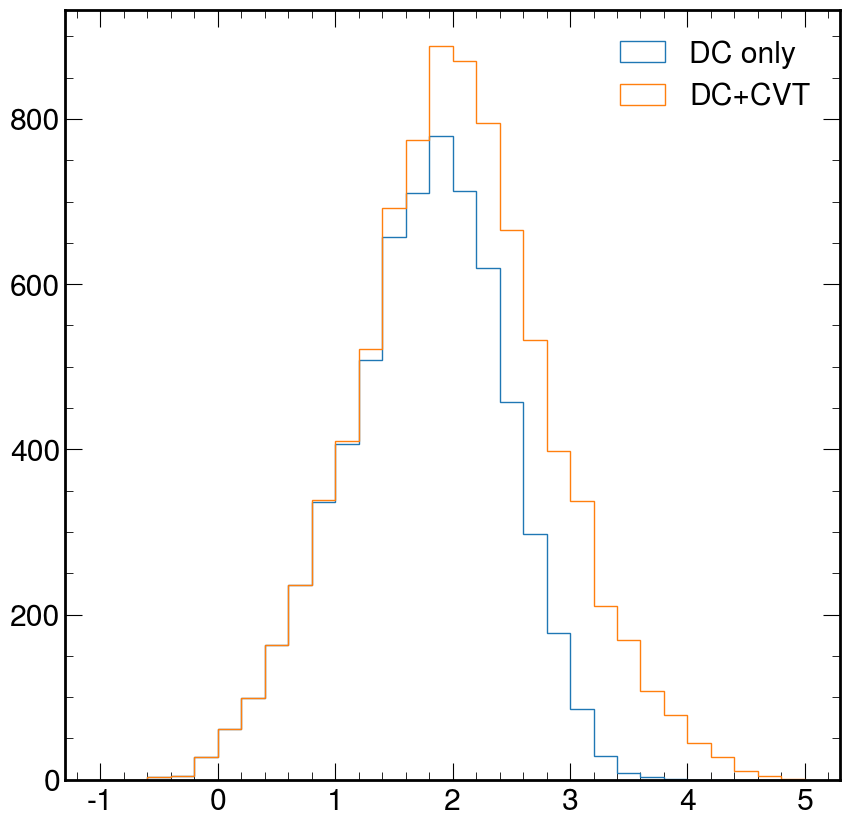

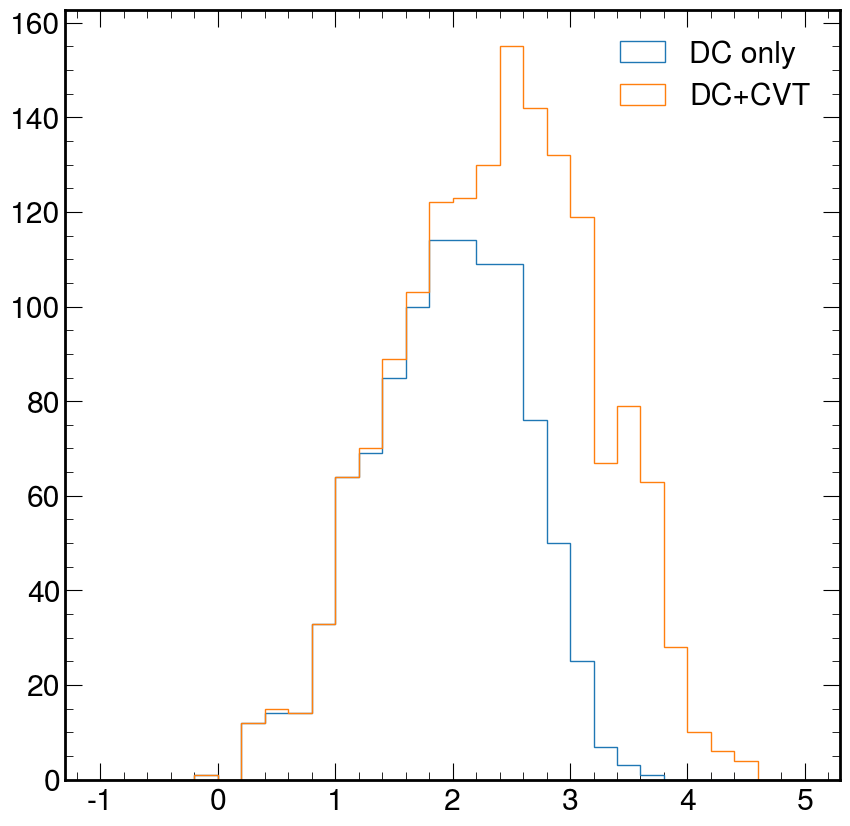

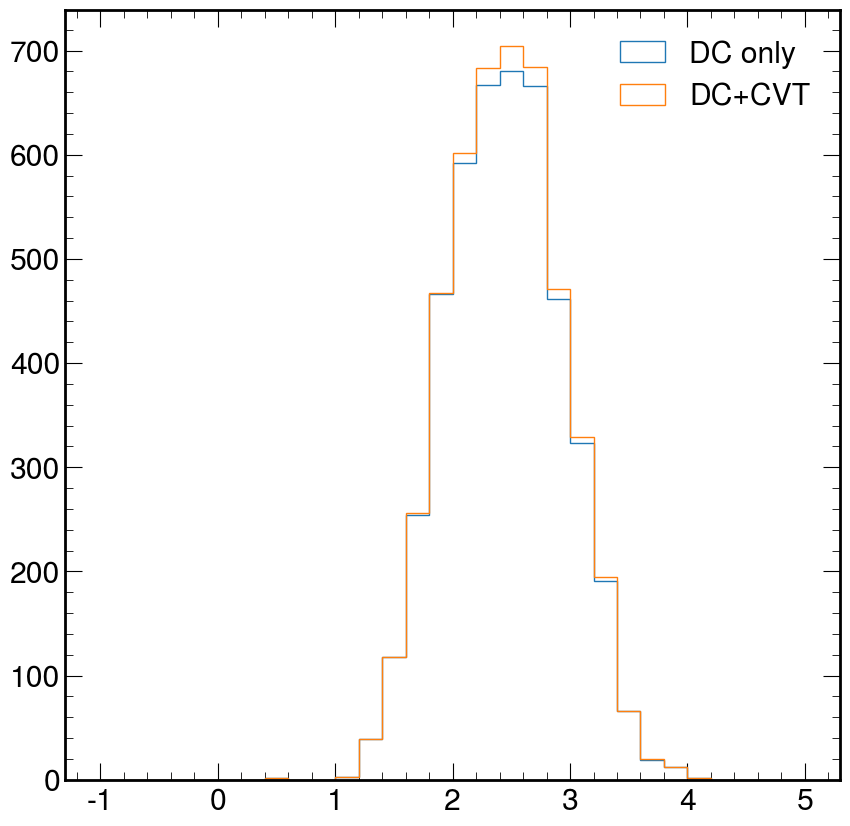

In [49]:
pT2min = 0.3**2
for h1pid in 211, -211:
    for h2pid in 211, -211, 2212:
        labels = {"DC only", "DC+CVT"}
        args=dict(histtype='step', bins=np.linspace(-1, 5, 31))
        for thetamax,label in zip((45, 135), labels):
            q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2<{pT2min} and leading_pT2<{pT2min} and leading_pid=={h1pid} and pid=={h2pid} and theta1lab>5*deg and theta2lab>5*deg and theta1lab<{thetamax}*deg and theta2lab<{thetamax}*deg"
            plt.hist(df.query(q).drap, **args, label=label)
        plt.legend()
        plt.show()

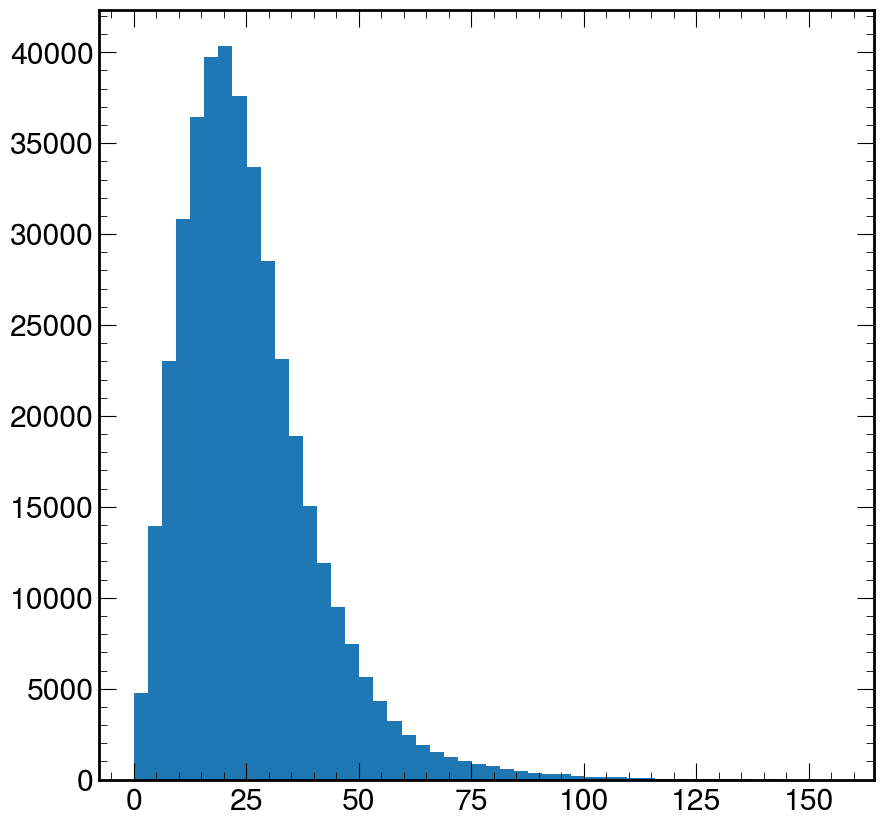

In [60]:
plt.hist(df.query("pid==2212 and pT2>0.09 and z>0.1").eval("theta2lab/deg"), bins=50); plt.show()

In [69]:
df['p'] = df.eval(f"sqrt((Q2/(2*.9383*x)*z)**2-(.9382*(abs(pid)==2212)+.1396*(abs(pid)==211))**2)")

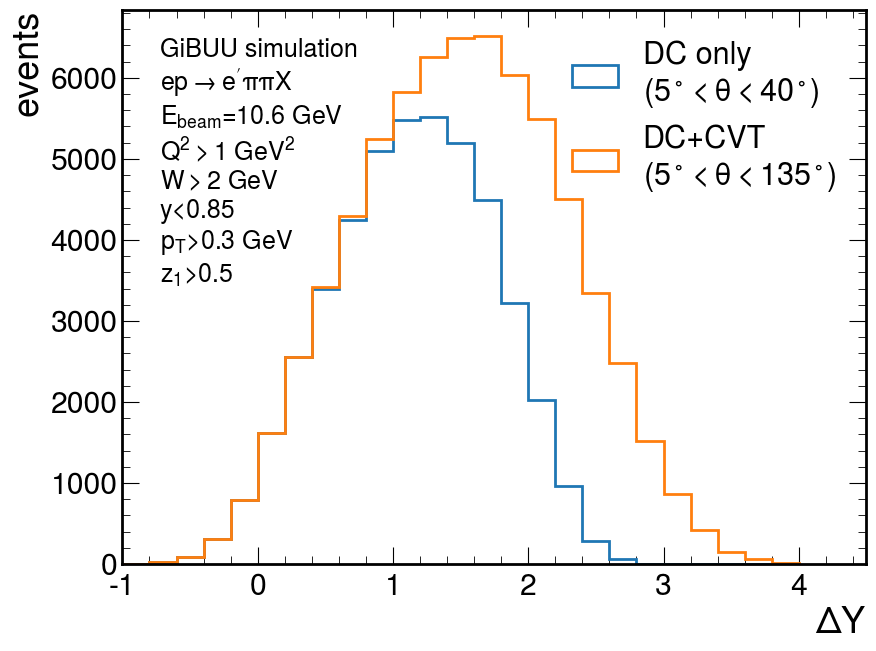

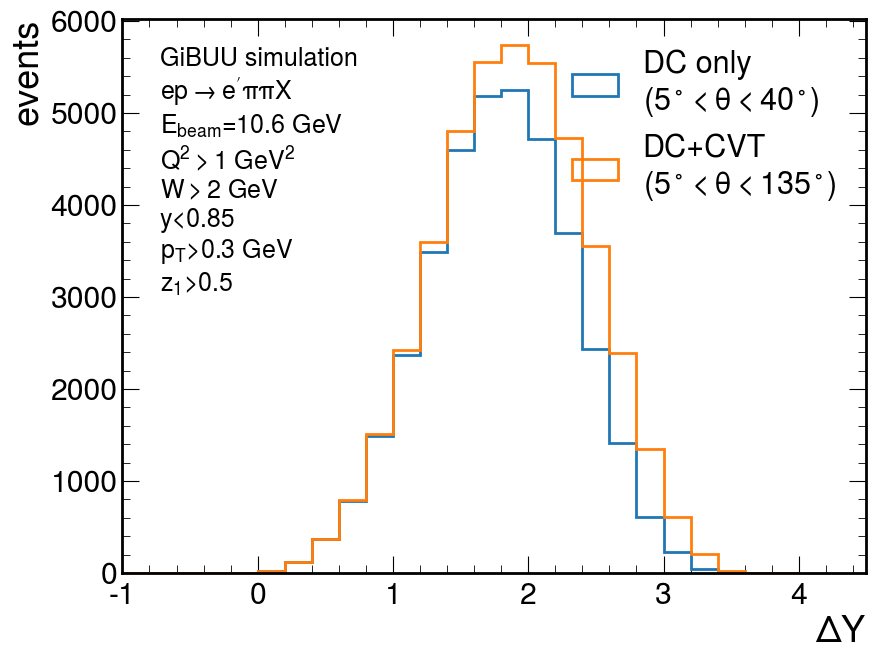

In [151]:
pT2min = 0.3**2
for pid1 in 211,:
    for pid2 in 211,2212:
        plt.subplots(1,1, figsize=(8*1.2,6*1.2))
        labels = {"DC only\n($5^\circ<\\theta<40^\circ$)", "DC+CVT\n($5^\circ<\\theta<135^\circ$)"}
        args=dict(histtype='step', bins=np.linspace(-1, 4, 26), linewidth=2)
        for thetamax,label in zip((40, 135), labels):
            q=f"theta1lab!=theta2lab and leading_z>0.5 and pT2>{pT2min} and leading_pT2>{pT2min} and abs(leading_pid)=={pid1} and abs(pid)=={pid2} and theta1lab>5*deg and theta2lab>5*deg and theta1lab<{thetamax}*deg and theta2lab<{thetamax}*deg"
            #q+=" and (theta2lab>40*deg and p>0.5 or theta2lab<40 and p>0.5)"
            plt.hist(df.query(q).drap, **args, label=label)
        plt.legend(fontsize=22)
        plt.xlabel("$\Delta Y$")
        plt.ylabel("events")
        plt.text(0.05, 0.95, "GiBUU simulation\n$ep\\rightarrow e'\pi\pi X$\n$E_{beam}$=10.6 GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\ny<0.85\n$p_T$>0.3 GeV\n$z_1$>$0.5$", verticalalignment='top',
                transform=plt.gca().transAxes, fontsize=18)
        plt.xlim(-1, 4.5)
        plt.savefig(f"rapidity_diff_{pid1}_{pid2}.pdf")
        plt.show()

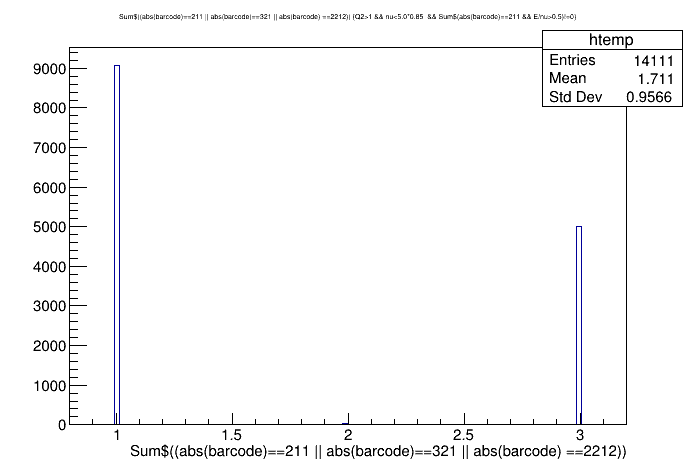

In [148]:
c=ROOT.TCanvas()
t.Draw("Sum$((abs(barcode)==211 || abs(barcode)==321 || abs(barcode) ==2212))", "Q2>1 && nu<5.0*0.85  && Sum$(abs(barcode)==211 && E/nu>0.5)!=0","")
c.Draw()